In [6]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
# Link to Dataset - https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
df = pd.read_csv('./IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


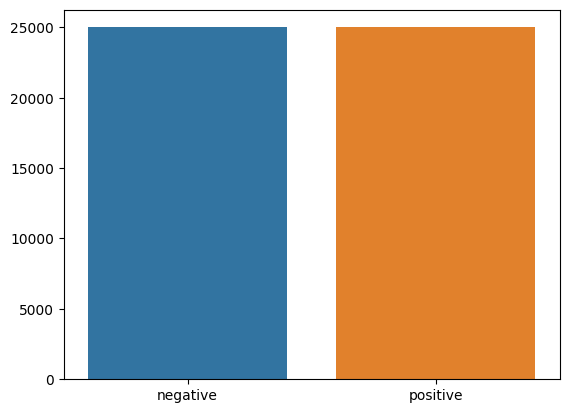

In [5]:
dd = pd.Series(df['sentiment']).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()

# Датасет

Як бачимо датасет доволі простий

Є дві колонки:

- Відгуки
- Категорія

Немає пропущених рядків, всі дані одного типу. 

Також одразу можемо бачити у відгуках html код, який краще буде прибрати під час обробки тексту.

# Почнемо нашу роботу з очистки даних

Приберемо html код

In [12]:
def data_preprocessing(text):
    text = re.sub('<.*?>', '', text.lower()) 

    return text

df['review'] = df['review'].apply(data_preprocessing)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# Застосуємо Spacy

Вже існуючу модель, застосовуємо до кожно відгука

Результат зберігаємо у нову колонку

In [13]:
nlp = spacy.load('en_core_web_md')
nlp.add_pipe('spacytextblob')

In [15]:
def prediction(text):
    doc = nlp(text)

    if doc._.blob.polarity < 0:
        return 'negative'
    else:
        return 'positive'

In [20]:
df['spacy_prediction'] = df['review'].apply(prediction)
df.head()

,review,sentiment,spacy_prediction
0,one of the other reviewers has mentioned that ...,positive,positive
1,a wonderful little production. the filming tec...,positive,positive
2,i thought this was a wonderful way to spend ti...,positive,positive
3,basically there's a family where a little boy ...,negative,negative
4,"petter mattei's ""love in the time of money"" is...",positive,positive


In [23]:
df.head(20)

,review,sentiment,spacy_prediction
0,one of the other reviewers has mentioned that ...,positive,positive
1,a wonderful little production. the filming tec...,positive,positive
2,i thought this was a wonderful way to spend ti...,positive,positive
3,basically there's a family where a little boy ...,negative,negative
4,"petter mattei's ""love in the time of money"" is...",positive,positive
5,"probably my all-time favorite movie, a story o...",positive,positive
6,i sure would like to see a resurrection of a u...,positive,positive
7,"this show was an amazing, fresh & innovative i...",negative,positive
8,encouraged by the positive comments about this...,negative,negative
9,if you like original gut wrenching laughter yo...,positive,positive


**Як бачимо, є помилки**

Порахуємо кількість неспівпадаючих категорій та визначимо загальну точність моделі для нашого датасету

In [40]:
def acc_spacy_model(d):
    df['acc_sp'] = np.where((df['sentiment'] != df['spacy_prediction']), 1, 0)

df.apply(acc_spacy_model)

review              None
sentiment           None
spacy_prediction    None
acc_sp              None
dtype: object

In [45]:
dups = df.pivot_table(index = ['acc_sp'], aggfunc ='size')
  
dups

acc_sp
0    34444
1    15556
dtype: int64

In [46]:
accuracy = 15556 / len(df['acc_sp']) * 100
accuracy

31.112000000000002

# Результат

Ця модель на виході видає неціле число від -1 до 1.

Припустивши, все що менше 0 це негативні відгуки, все що вище - позитивні.

За таких критеріїв точність моделі для данного датасету всього 31%